# Standardization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
340,15588080,Female,53,104000,1
73,15782530,Female,33,113000,0
247,15775590,Female,57,122000,1
368,15779744,Male,38,71000,0
2,15668575,Female,26,43000,0


In [4]:
df2=df.iloc[:,2:]

In [5]:
df2

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [6]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df2.drop('Purchased',axis=1),df['Purchased'],random_state=0,test_size=0.3)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

scaler.fit(x_train)

x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [11]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)
x_train_scaled.describe().round(1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Text(0.5, 1.0, 'After Scaling')

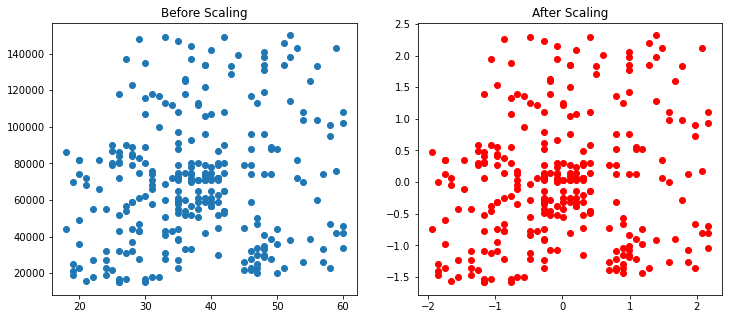

In [16]:
fig , (ax1,ax2) =plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],c='Red')
ax2.set_title('After Scaling')

<AxesSubplot:xlabel='Age', ylabel='Density'>

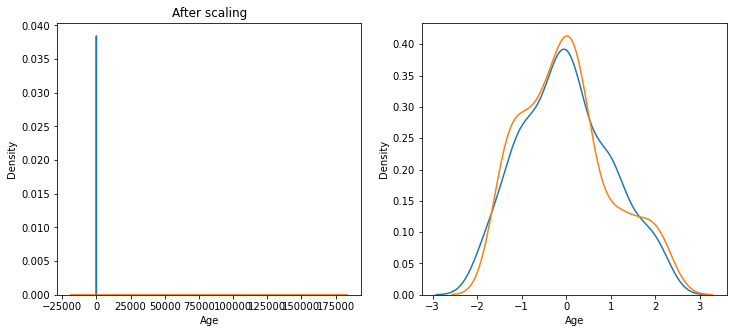

In [29]:
fig , (ax1,ax2) =plt.subplots(ncols=2,figsize=(12,5))


ax1.set_title('Before scaling')
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

ax1.set_title('After scaling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)